In [1]:
import pandas as pd

In [6]:
data = pd.read_csv("training_final.csv")

In [7]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin_Type,Below 10,Above 65,Fare2,Embarked_C,Embarked_S
0,0,3,1,1,0,1,0,0,-0.499958,0,0
1,1,1,0,1,0,0,0,0,0.788503,1,0
2,1,3,0,0,0,1,0,0,-0.486376,0,0
3,1,1,0,1,0,0,0,0,0.422623,0,0
4,0,3,1,0,0,1,0,0,-0.483861,0,0


In [8]:
from sklearn.model_selection import train_test_split

In [46]:
data["label"] = list(zip(data["Survived"] , data["Sex"] , data["Cabin_Type"]))

In [68]:
data

,Survived,Pclass,Sex,SibSp,Parch,Cabin_Type,Below 10,Above 65,Fare2,Embarked_C,Embarked_S,label
0,0,3,1,1,0,1,0,0,-0.499958,0,0,"(0, 1, 1)"
1,1,1,0,1,0,0,0,0,0.788503,1,0,"(1, 0, 0)"
2,1,3,0,0,0,1,0,0,-0.486376,0,0,"(1, 0, 1)"
3,1,1,0,1,0,0,0,0,0.422623,0,0,"(1, 0, 0)"
4,0,3,1,0,0,1,0,0,-0.483861,0,0,"(0, 1, 1)"
...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,0,0,1,0,0,-0.384258,0,0,"(0, 1, 1)"
885,1,1,0,0,0,0,0,0,-0.042189,0,0,"(1, 0, 0)"
886,0,3,0,1,2,1,0,0,-0.173986,0,0,"(0, 0, 1)"
887,1,1,1,0,0,0,0,0,-0.042189,1,0,"(1, 1, 0)"


In [182]:
x_train , x_test , y_train , y_test = train_test_split(data.drop(["Survived" , "label"] ,axis = 1 ) , data["Survived"] , test_size = 0.2 , 
stratify=data["label"])

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
rf = RandomForestClassifier(max_depth = 7 , criterion="entropy")

In [185]:
rf.fit(x_train , y_train)

RandomForestClassifier(criterion='entropy', max_depth=7)

In [186]:
y_pred = rf.predict(x_test)

In [187]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred=y_pred , y_true=y_test))

0.8089887640449438


In [74]:
import matplotlib.pyplot as plt

In [106]:
def predict(criterion = "gini"):
    arr = []
    for i in range(1 , 20):
        rf = RandomForestClassifier(max_depth = i , criterion=criterion)
        rf.fit(x_train , y_train)
        y_pred = rf.predict(x_test)
        arr.append(accuracy_score(y_pred=y_pred , y_true=y_test))
    plt.plot([i for i in range(1,20)] , arr)
    plt.show()

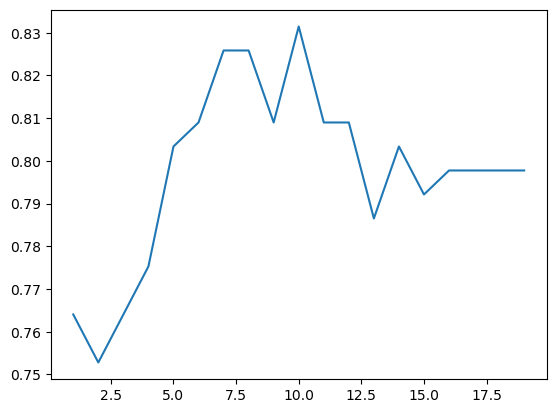

In [107]:
predict()

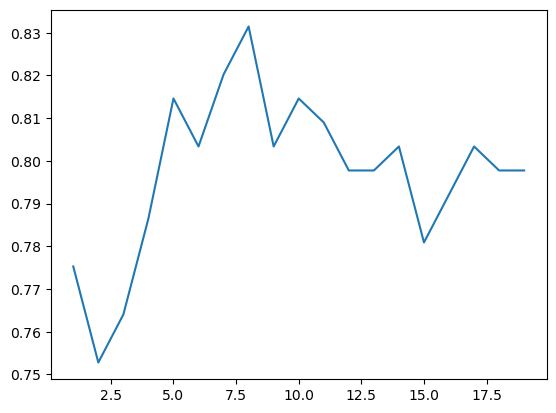

In [108]:
predict(criterion="entropy")

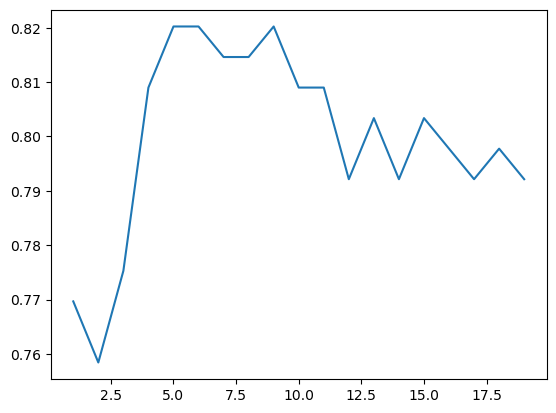

In [109]:
predict(criterion="log_loss")

In [143]:
from sklearn.model_selection import cross_val_score, KFold

In [144]:
import numpy as np

In [197]:
def predict2():
    n_folds = 5
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    model = RandomForestClassifier(n_estimators=7 , criterion='entropy')
    scores = cross_val_score(model, data.drop(["Survived" , "label"] , axis = 1), data["Survived"], cv=kf, scoring='accuracy')
    return np.mean(scores)

In [198]:
predict2()

0.8042785501174381

In [199]:
ans = []
for i in range(100):
    x= predict2()
    ans.append(x)
print(sum(ans)/100)

0.8046181679680059


In [309]:
ans = []
final_model = None
ma = 0
for i in range(500):
    x_train , x_test , y_train , y_test = train_test_split(data.drop(["Survived" , "label"] ,axis = 1 ) , data["Survived"] , test_size = 0.2 , 
    stratify=data["label"])
    rf = RandomForestClassifier(max_depth = 7 , criterion="entropy")
    rf.fit(x_train , y_train)
    y_pred = rf.predict(x_test)
    from sklearn.metrics import accuracy_score
    x = accuracy_score(y_pred=y_pred , y_true=y_test)
    if(x > ma):
        final_model = rf
        ma = x
    ans.append(x)
print("Mean: " , sum(ans)/200)
print("Min: ", min(ans) )
print("Max: " , max(ans))

Mean:  2.0498876404494384
Min:  0.7640449438202247
Max:  0.8764044943820225


In [310]:
final_model

RandomForestClassifier(criterion='entropy', max_depth=7)

In [311]:
y_pred = final_model.predict(x_test)
accuracy_score(y_true=y_test , y_pred=y_pred)

0.8707865168539326

In [292]:
import pickle

In [ ]:
with open("model.pkl" , "wb") as f:
    pickle.dump(final_model , f)

In [320]:
with open("model.pkl" , "rb") as f:
    m = pickle.load(f)
    y_pred = m.predict(x_test)
    print(accuracy_score(y_pred=y_pred , y_true=y_test)) 

0.8595505617977528


In [227]:
pred_data = pd.read_csv("test.csv")

In [228]:
pred_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [230]:
pred_data.drop(["PassengerId" , "Name" , "Ticket"] , axis = 1 , inplace = True)
pred_data["Sex"] = (pred_data["Sex"]=="male").astype(int)

In [231]:
pred_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,NaN,Q
1,3,0,47.0,1,0,7.0000,NaN,S
2,2,1,62.0,0,0,9.6875,NaN,Q
3,3,1,27.0,0,0,8.6625,NaN,S
4,3,0,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,NaN,S
414,1,0,39.0,0,0,108.9000,C105,C
415,3,1,38.5,0,0,7.2500,NaN,S
416,3,1,NaN,0,0,8.0500,NaN,S


In [232]:
pred_data["Below 10"] = (pred_data["Age"]<=10).astype(int)
pred_data["Above 65"] = (pred_data["Age"]>=65).astype(int)

In [233]:
pred_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Below 10,Above 65
0,3,1,34.5,0,0,7.8292,NaN,Q,0,0
1,3,0,47.0,1,0,7.0000,NaN,S,0,0
2,2,1,62.0,0,0,9.6875,NaN,Q,0,0
3,3,1,27.0,0,0,8.6625,NaN,S,0,0
4,3,0,22.0,1,1,12.2875,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,NaN,S,0,0
414,1,0,39.0,0,0,108.9000,C105,C,0,0
415,3,1,38.5,0,0,7.2500,NaN,S,0,0
416,3,1,NaN,0,0,8.0500,NaN,S,0,0


In [234]:
pred_data.drop(["Age"], axis =1 , inplace = True)

In [235]:
pred_data

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Below 10,Above 65
0,3,1,0,0,7.8292,NaN,Q,0,0
1,3,0,1,0,7.0000,NaN,S,0,0
2,2,1,0,0,9.6875,NaN,Q,0,0
3,3,1,0,0,8.6625,NaN,S,0,0
4,3,0,1,1,12.2875,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...
413,3,1,0,0,8.0500,NaN,S,0,0
414,1,0,0,0,108.9000,C105,C,0,0
415,3,1,0,0,7.2500,NaN,S,0,0
416,3,1,0,0,8.0500,NaN,S,0,0


In [236]:
pred_data["Embarked_C"] = (pred_data["Embarked"]=="C").astype(int)
pred_data["Embarked_S"] = (pred_data["Embarked"]=="S").astype(int)

In [238]:
pred_data.drop(["Embarked"] , axis = 1 , inplace = True)

In [246]:
pred_data["Parch"] = pred_data["Parch"].clip(upper = 3)

In [248]:
pred_data["Parch"].value_counts()

Parch
0    324
1     52
2     33
3      9
Name: count, dtype: int64

In [249]:
pred_data

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Below 10,Above 65,Embarked_C,Embarked_S
0,3,1,0,0,7.8292,NaN,0,0,0,0
1,3,0,1,0,7.0000,NaN,0,0,0,1
2,2,1,0,0,9.6875,NaN,0,0,0,0
3,3,1,0,0,8.6625,NaN,0,0,0,1
4,3,0,1,1,12.2875,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,0,0,8.0500,NaN,0,0,0,1
414,1,0,0,0,108.9000,C105,0,0,1,0
415,3,1,0,0,7.2500,NaN,0,0,0,1
416,3,1,0,0,8.0500,NaN,0,0,0,1


In [253]:
pred_data["Fare"] = (pred_data["Fare"]-32)/50

In [257]:
pred_data["Cabin_Type"] = (pred_data["Cabin"].isna()).astype(int)

In [258]:
pred_data

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Below 10,Above 65,Embarked_C,Embarked_S,Cabin_Type
0,3,1,0,0,-0.483416,NaN,0,0,0,0,1
1,3,0,1,0,-0.500000,NaN,0,0,0,1,1
2,2,1,0,0,-0.446250,NaN,0,0,0,0,1
3,3,1,0,0,-0.466750,NaN,0,0,0,1,1
4,3,0,1,1,-0.394250,NaN,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,0,0,-0.479000,NaN,0,0,0,1,1
414,1,0,0,0,1.538000,C105,0,0,1,0,0
415,3,1,0,0,-0.495000,NaN,0,0,0,1,1
416,3,1,0,0,-0.479000,NaN,0,0,0,1,1


In [259]:
pred_data["Cabin_Type"].value_counts()

Cabin_Type
1    327
0     91
Name: count, dtype: int64

In [261]:
pred_data.drop(["Cabin"] , axis = 1 , inplace = True)

In [263]:
x_train

,Pclass,Sex,SibSp,Parch,Cabin_Type,Below 10,Above 65,Fare2,Embarked_C,Embarked_S
858,3,1,2,0,1,0,0,-0.361957,0,0
872,2,0,1,0,1,0,0,-0.162919,1,0
454,3,1,0,0,1,0,0,-0.486964,1,0
830,3,1,0,0,1,0,0,-0.500377,1,0
731,2,1,0,0,1,0,0,-0.645841,0,0
...,...,...,...,...,...,...,...,...,...,...
868,3,1,0,0,1,0,0,-0.486964,0,0
570,1,0,2,0,0,0,0,0.390010,0,0
385,3,1,5,2,1,1,0,0.297868,0,0
354,3,1,0,0,1,0,0,-0.454684,0,0


In [264]:
pred_data["Fare2"] = pred_data["Fare"]
pred_data.drop(["Fare"] , axis = 1 , inplace = True)

In [265]:
pred_data = pred_data[["Pclass" , "Sex" , "SibSp" , "Parch" , "Cabin_Type" , "Below 10" , "Above 65" , "Fare2" , "Embarked_C" , 
"Embarked_S"]]

In [269]:
pred_data

,Pclass,Sex,SibSp,Parch,Cabin_Type,Below 10,Above 65,Fare2,Embarked_C,Embarked_S
0,3,1,0,0,1,0,0,-0.483416,0,0
1,3,0,1,0,1,0,0,-0.500000,0,1
2,2,1,0,0,1,0,0,-0.446250,0,0
3,3,1,0,0,1,0,0,-0.466750,0,1
4,3,0,1,1,1,0,0,-0.394250,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,0,0,1,0,0,-0.479000,0,1
414,1,0,0,0,0,0,0,1.538000,1,0
415,3,1,0,0,1,0,0,-0.495000,0,1
416,3,1,0,0,1,0,0,-0.479000,0,1


In [296]:
final_model

RandomForestClassifier(criterion='entropy', max_depth=7)

In [271]:
pred_data["PassengerId"] = pd.read_csv("test.csv")["PassengerId"]

C:\Users\aditya\AppData\Local\Temp\ipykernel_16756\2606890024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_data["PassengerId"] = pd.read_csv("test.csv")["PassengerId"]


In [299]:
pred_data.drop(["Survived"] , axis = 1 , inplace = True)

C:\Users\aditya\AppData\Local\Temp\ipykernel_16756\1391023582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_data.drop(["Survived"] , axis = 1 , inplace = True)


In [300]:
pred_data

,Pclass,Sex,SibSp,Parch,Cabin_Type,Below 10,Above 65,Fare2,Embarked_C,Embarked_S,PassengerId
0,3,1,0,0,1,0,0,-0.483416,0,0,892
1,3,0,1,0,1,0,0,-0.500000,0,1,893
2,2,1,0,0,1,0,0,-0.446250,0,0,894
3,3,1,0,0,1,0,0,-0.466750,0,1,895
4,3,0,1,1,1,0,0,-0.394250,0,1,896
...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,0,0,1,0,0,-0.479000,0,1,1305
414,1,0,0,0,0,0,0,1.538000,1,0,1306
415,3,1,0,0,1,0,0,-0.495000,0,1,1307
416,3,1,0,0,1,0,0,-0.479000,0,1,1308


In [302]:
y_pred = final_model.predict(pred_data.drop(["PassengerId"] , axis = 1))

In [303]:
pred_data["Survived"] = y_pred

C:\Users\aditya\AppData\Local\Temp\ipykernel_16756\1567391580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_data["Survived"] = y_pred


In [304]:
pred_data

,Pclass,Sex,SibSp,Parch,Cabin_Type,Below 10,Above 65,Fare2,Embarked_C,Embarked_S,PassengerId,Survived
0,3,1,0,0,1,0,0,-0.483416,0,0,892,0
1,3,0,1,0,1,0,0,-0.500000,0,1,893,1
2,2,1,0,0,1,0,0,-0.446250,0,0,894,0
3,3,1,0,0,1,0,0,-0.466750,0,1,895,0
4,3,0,1,1,1,0,0,-0.394250,0,1,896,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,0,0,1,0,0,-0.479000,0,1,1305,0
414,1,0,0,0,0,0,0,1.538000,1,0,1306,1
415,3,1,0,0,1,0,0,-0.495000,0,1,1307,0
416,3,1,0,0,1,0,0,-0.479000,0,1,1308,0


In [305]:
pred_data["Survived"].mean()

0.3133971291866029

In [308]:
pred_data[["PassengerId" , "Survived"]].to_csv("prediction.csv" , index = False)

In [307]:
pred_data[pred_data["Sex"]==1]["Survived"].mean()

0.07518796992481203